<a href="https://colab.research.google.com/github/beercafeguy/PyMLLab/blob/master/ML_A_Z/dimensionality_reduction/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dimensionality Reduction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
!ls -ltr /content/drive/MyDrive/ML_A_Z/Part_9_Dimensionality_Reduction/Section_43_Principal_Component_Analysis_PCA/Python/Wine.csv

-rw------- 1 root root 11462 Apr  7  2020 /content/drive/MyDrive/ML_A_Z/Part_9_Dimensionality_Reduction/Section_43_Principal_Component_Analysis_PCA/Python/Wine.csv


In [7]:
path ='/content/drive/MyDrive/ML_A_Z/Part_9_Dimensionality_Reduction/Section_43_Principal_Component_Analysis_PCA/Python/Wine.csv'
df = pd.read_csv(path)
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [8]:
df.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
Customer_Segment        0
dtype: int64

In [19]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2023)

In [21]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [22]:
X_train_scaled

array([[ 0.5864482 , -0.49634698,  0.15935905, ...,  0.36494765,
         1.13208411,  0.53915507],
       [-1.16514287, -0.25555306, -2.4616164 , ...,  1.37727907,
         0.41202851, -0.12375691],
       [-0.73975647,  1.84024584,  1.34064376, ..., -0.16322527,
         0.6379283 , -1.21282658],
       ...,
       [ 0.84918686,  0.79680554,  0.63925596, ...,  0.01283237,
        -1.19750756, -0.21845862],
       [ 0.04845951, -0.28230794,  3.14948597, ...,  0.76107733,
         0.7508782 ,  0.25504994],
       [-1.70313156, -0.62120309,  0.93457714, ...,  1.77340876,
         0.76499694, -0.59095202]])

### Applying PCA

In [23]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_train_scaled_reduced = pca.fit_transform(X_train_scaled)
X_test_scaled_reduced = pca.transform(X_test_scaled)

In [24]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 0)
lr.fit(X_train_scaled_reduced, y_train)

LogisticRegression(random_state=0)

In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = lr.predict(X_test_scaled_reduced)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[13  0  0]
 [ 1 12  0]
 [ 0  0 10]]


0.9722222222222222

## Training Set Visualization

<ipython-input-26-97d553b2482d>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


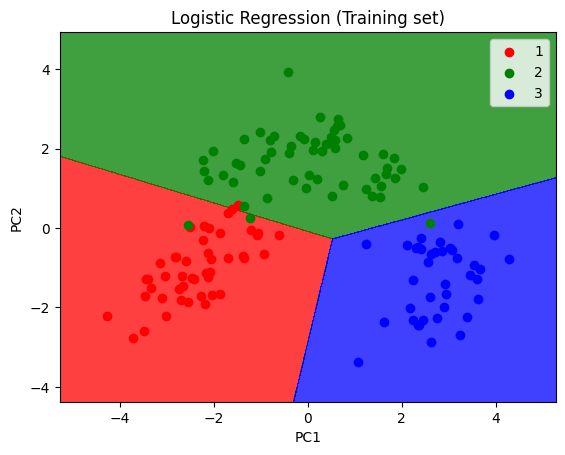

In [26]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train_scaled_reduced, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, lr.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

<ipython-input-27-759aae79347d>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


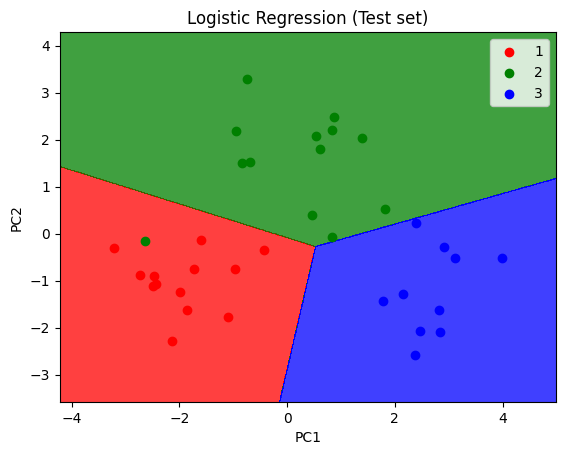

In [27]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test_scaled_reduced, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, lr.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

## LR w/o PCA

In [28]:
from sklearn.linear_model import LogisticRegression
lr_nopca = LogisticRegression(random_state = 0)
lr_nopca.fit(X_train_scaled, y_train)

LogisticRegression(random_state=0)

In [29]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = lr_nopca.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[13  0  0]
 [ 0 12  1]
 [ 0  0 10]]


0.9722222222222222

array([[-0.14019718,  0.25112164,  0.01208683,  0.24995918, -0.1625854 ,
        -0.3909177 , -0.41742896,  0.3146026 , -0.30623209,  0.07783174,
        -0.29473839, -0.37093708, -0.2790765 ],
       [-0.49712548, -0.19275907, -0.27414446,  0.10264802, -0.30417331,
        -0.05619703,  0.03425153, -0.03557531,  0.00091826, -0.53533398,
         0.27517271,  0.18611888, -0.36736432]])